In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('data_sem_pca.csv')
df.drop('Unnamed: 0', axis='columns', inplace=True)
df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,...,keyword_xmen,keyword_yacht,keyword_yakuza,keyword_yardsale,keyword_youngerversionofcharacter,keyword_zeus,keyword_zombie,keyword_zombieapocalypse,keyword_zoo,keyword_zorro
0,0.889163,0.529412,0.391321,0.037090,0.001559,1.000000,0.524453,0.007358,0.603479,0.019402,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.370690,0.501548,0.024393,0.043395,0.062497,0.406840,0.278865,0.073620,0.244515,0.024559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.740148,0.436533,0.012140,0.006914,0.017184,0.263080,0.163256,0.017813,0.196284,0.020056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.486068,0.956518,1.000000,0.042185,0.589253,0.677216,0.162559,0.533702,0.020466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.567734,0.386997,0.020567,0.022959,0.000997,0.096066,0.125579,0.002849,0.145681,0.021587,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Variáveis experimentais
ks = [i for i in range(1,21)]
knnresults = {}
treeresults={}
svmresults={}

## 1. Número de curtidas na página do filme do facebook

In [4]:
title = 'Número de curtidas na página do filme do facebook'
variable = 'movie_facebook_likes'
X = df.drop(variable, axis='columns')
y = df[variable]

### kNN

In [5]:
kresults = []
for k in ks:
    regressor = KNeighborsRegressor(n_neighbors=k, p=2, algorithm='kd_tree', n_jobs=-1)
    result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1)
    kresults.append(abs(result.mean()))

In [6]:
kseries = pd.Series(data=kresults, index=ks)
plot = kseries.plot(x=ks)
plot.set_xticks(ks)
plot.set_xlabel('k')
plot.set_ylabel('Erro Absoluto Médio')
plot.set_title(title+'\nRegressão kNN: Erro Absoluto Médio variando k'), kseries

(Text(0.5,1,'Número de curtidas na página do filme do facebook\nRegressão kNN: Erro Absoluto Médio variando k'),
 1     0.040079
 2     0.036995
 3     0.036041
 4     0.035165
 5     0.034637
 6     0.034334
 7     0.034153
 8     0.034059
 9     0.033850
 10    0.033685
 11    0.033695
 12    0.033625
 13    0.033620
 14    0.033601
 15    0.033474
 16    0.033478
 17    0.033459
 18    0.033397
 19    0.033298
 20    0.033264
 dtype: float64)

In [7]:
# adotando k=9
k=9
knnresults[variable] = kresults[k-1]
knnresults[variable]

0.033849668919285474

### Árvore de Decisão

In [8]:
# Todas as configurações são default
regressor = DecisionTreeRegressor(random_state=0)
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
treeresults[variable] = abs(result.mean())
treeresults[variable]

0.03014828100405665

### SVM

In [9]:
regressor = SVR()
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
svmresults[variable] = abs(result.mean())
svmresults[variable]

0.06840148419073976

## 2. Número de avaliações por usuário

In [10]:
title = 'Número de avaliações por usuário'
variable = 'num_user_for_reviews'
X = df.drop(variable, axis='columns')
y = df[variable]

### kNN

In [11]:
kresults = []
for k in ks:
    regressor = KNeighborsRegressor(n_neighbors=k, p=2, algorithm='kd_tree', n_jobs=-1)
    result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1)
    kresults.append(abs(result.mean()))

(Text(0.5,1,'Número de avaliações por usuário\nRegressão kNN: Erro Absoluto Médio variando k'),
 1     0.053687
 2     0.048522
 3     0.045774
 4     0.044559
 5     0.043592
 6     0.043027
 7     0.042588
 8     0.042241
 9     0.041832
 10    0.041510
 11    0.041334
 12    0.041198
 13    0.041154
 14    0.041026
 15    0.040905
 16    0.040785
 17    0.040736
 18    0.040696
 19    0.040621
 20    0.040670
 dtype: float64)

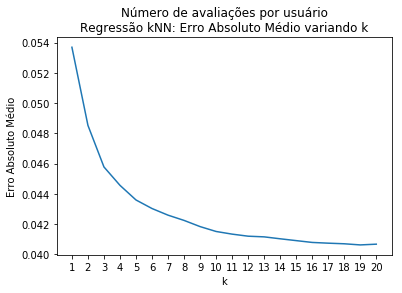

In [12]:
kseries = pd.Series(data=kresults, index=ks)
plot = kseries.plot(x=ks)
plot.set_xticks(ks)
plot.set_xlabel('k')
plot.set_ylabel('Erro Absoluto Médio')
plot.set_title(title+'\nRegressão kNN: Erro Absoluto Médio variando k'), kseries

In [13]:
# Adotando k = 11
k=11
knnresults[variable] = kresults[k-1]
knnresults[variable]

0.041334319849585015

### Árvore de Decisão

In [14]:
# Todas as configurações são default
regressor = DecisionTreeRegressor(random_state=0)
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
treeresults[variable] = abs(result.mean())
treeresults[variable]

0.02288381887370775

### SVM

In [15]:
regressor = SVR()
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
svmresults[variable] = abs(result.mean())
svmresults[variable]

0.07484432637532429

## 3. Número de revisões críticas

In [16]:
title = 'Número de Revisões Críticas'
variable = 'num_critic_for_reviews'
X = df.drop(variable, axis='columns')
y = df[variable]

### kNN

In [17]:
kresults = []
for k in ks:
    regressor = KNeighborsRegressor(n_neighbors=k, p=2, algorithm='kd_tree', n_jobs=-1)
    result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1)
    kresults.append(abs(result.mean()))

(Text(0.5,1,'Número de Revisões Críticas\nRegressão kNN: Erro Absoluto Médio variando k'),
 1     0.117173
 2     0.103399
 3     0.097792
 4     0.095194
 5     0.093600
 6     0.092793
 7     0.091868
 8     0.091494
 9     0.090820
 10    0.090389
 11    0.090058
 12    0.089738
 13    0.089786
 14    0.089605
 15    0.089525
 16    0.089437
 17    0.089603
 18    0.089455
 19    0.089338
 20    0.089169
 dtype: float64)

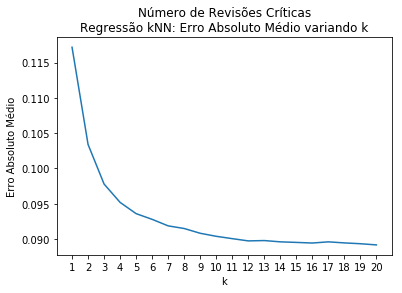

In [18]:
kseries = pd.Series(data=kresults, index=ks)
plot = kseries.plot(x=ks)
plot.set_xticks(ks)
plot.set_xlabel('k')
plot.set_ylabel('Erro Absoluto Médio')
plot.set_title(title+'\nRegressão kNN: Erro Absoluto Médio variando k'), kseries

In [19]:
# Adotando k = 11
k=11
knnresults[variable] = kresults[k-1]
knnresults[variable]

0.09005788469670166

### Árvore de Decisão

In [20]:
# Todas as configurações são default
regressor = DecisionTreeRegressor(random_state=0)
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
treeresults[variable] = abs(result.mean())
treeresults[variable]

0.049119969356152655

### SVM

In [21]:
regressor = SVR()
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
svmresults[variable] = abs(result.mean())
svmresults[variable]

0.08869283638576433

## 4. Número de Votos

In [22]:
title = 'Número de Votos'
variable = 'num_voted_users'
X = df.drop(variable, axis='columns')
y = df[variable]

### kNN

In [23]:
kresults = []
for k in ks:
    regressor = KNeighborsRegressor(n_neighbors=k, p=2, algorithm='kd_tree', n_jobs=-1)
    result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1)
    kresults.append(abs(result.mean()))

(Text(0.5,1,'Número de Votos\nRegressão kNN: Erro Absoluto Médio variando k'),
 1     0.054490
 2     0.050272
 3     0.048704
 4     0.047572
 5     0.046919
 6     0.046494
 7     0.046284
 8     0.046077
 9     0.045893
 10    0.045865
 11    0.045681
 12    0.045709
 13    0.045681
 14    0.045530
 15    0.045443
 16    0.045391
 17    0.045392
 18    0.045377
 19    0.045370
 20    0.045408
 dtype: float64)

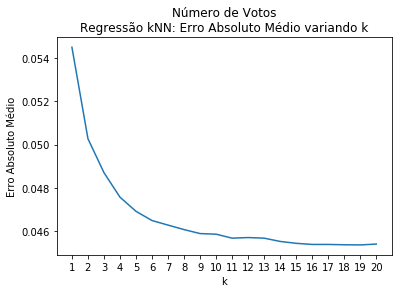

In [24]:
kseries = pd.Series(data=kresults, index=ks)
plot = kseries.plot(x=ks)
plot.set_xticks(ks)
plot.set_xlabel('k')
plot.set_ylabel('Erro Absoluto Médio')
plot.set_title(title+'\nRegressão kNN: Erro Absoluto Médio variando k'), kseries

In [25]:
# Adotando k = 10
k = 10
knnresults[variable] = kresults[k-1]
knnresults[variable]

0.04586470078821841

### Árvore de Decisão

In [26]:
# Todas as configurações são default
regressor = DecisionTreeRegressor(random_state=0)
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
treeresults[variable] = abs(result.mean())
treeresults[variable]

0.0217579726897603

### SVM

In [27]:
regressor = SVR()
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
svmresults[variable] = abs(result.mean())
svmresults[variable]

0.08083837112136291

## 5. Arrecadação

In [28]:
title = 'Arrecadação'
variable = 'gross'
X = df.drop(variable, axis='columns')
y = df[variable]

### kNN

In [29]:
kresults = []
for k in ks:
    regressor = KNeighborsRegressor(n_neighbors=k, p=2, algorithm='kd_tree', n_jobs=-1)
    result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1)
    kresults.append(abs(result.mean()))

(Text(0.5,1,'Arrecadação\nRegressão kNN: Erro Absoluto Médio variando k'),
 1     0.062296
 2     0.056800
 3     0.054440
 4     0.053085
 5     0.052078
 6     0.051734
 7     0.051210
 8     0.050955
 9     0.050681
 10    0.050647
 11    0.050496
 12    0.050389
 13    0.050212
 14    0.050329
 15    0.050189
 16    0.049984
 17    0.049893
 18    0.049883
 19    0.049761
 20    0.049654
 dtype: float64)

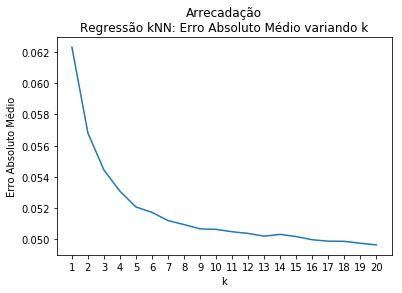

In [30]:
kseries = pd.Series(data=kresults, index=ks)
plot = kseries.plot(x=ks)
plot.set_xticks(ks)
plot.set_xlabel('k')
plot.set_ylabel('Erro Absoluto Médio')
plot.set_title(title+'\nRegressão kNN: Erro Absoluto Médio variando k'), kseries

In [31]:
# Adotando k = 10
k=10
knnresults[variable] = kresults[k-1]
knnresults[variable]

0.05064743264536

### Árvore de Decisão

In [32]:
# Todas as configurações são default
regressor = DecisionTreeRegressor(random_state=0)
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
treeresults[variable] = abs(result.mean())
treeresults[variable]

0.043380597945230366

### SVM

In [33]:
regressor = SVR()
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
svmresults[variable] = abs(result.mean())
svmresults[variable]

0.07457923646025658

## 6. Escore IMDb

In [34]:
title = 'Escore IMDb'
variable = 'imdb_score'
X = df.drop(variable, axis='columns')
y = df[variable]

### kNN

In [35]:
kresults = []
for k in ks:
    regressor = KNeighborsRegressor(n_neighbors=k, p=2, algorithm='kd_tree', n_jobs=-1)
    result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1)
    kresults.append(abs(result.mean()))

(Text(0.5,1,'Escore IMDb\nRegressão kNN: Erro Absoluto Médio variando k'),
 1     0.144297
 2     0.127054
 3     0.119129
 4     0.116006
 5     0.113111
 6     0.111568
 7     0.110618
 8     0.109653
 9     0.108912
 10    0.108476
 11    0.107859
 12    0.107591
 13    0.107314
 14    0.107344
 15    0.107042
 16    0.107046
 17    0.106872
 18    0.106692
 19    0.106465
 20    0.106377
 dtype: float64)

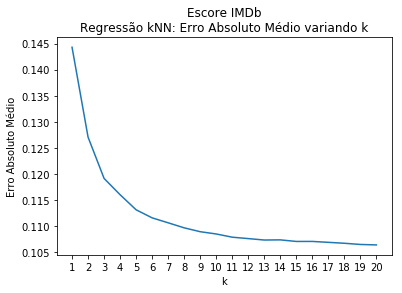

In [36]:
kseries = pd.Series(data=kresults, index=ks)
plot = kseries.plot(x=ks)
plot.set_xticks(ks)
plot.set_xlabel('k')
plot.set_ylabel('Erro Absoluto Médio')
plot.set_title(title+'\nRegressão kNN: Erro Absoluto Médio variando k'), kseries

In [37]:
# Adotando k = 8
k = 8
knnresults[variable] = kresults[k-1]
knnresults[variable]

0.10965296516645426

### Árvore de Decisão

In [38]:
# Todas as configurações são default
regressor = DecisionTreeRegressor(random_state=0)
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
treeresults[variable] = abs(result.mean())
treeresults[variable]

0.09614450290621897

### SVM

In [39]:
regressor = SVR()
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
svmresults[variable] = abs(result.mean())
svmresults[variable]

0.09708082371468299

# Visão Geral

Text(0.5,0,'Modelo Utilizado')

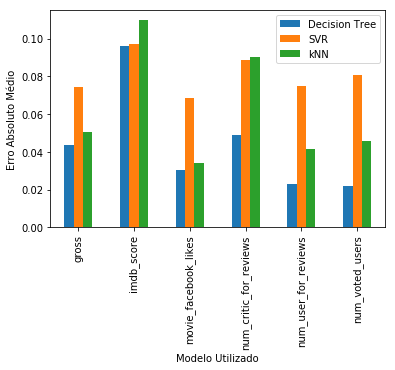

In [50]:
full_results = {
    'kNN': knnresults,
    'Decision Tree': treeresults,
    'SVR': svmresults
}
full_results = pd.DataFrame(full_results)
plot = full_results.plot(kind='bar')
plot.set_ylabel('Erro Absoluto Médio')
plot.set_xlabel('Modelo Utilizado')